# [Python / Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/)

#### INFO
* numpy for Matlab users http://wiki.scipy.org/NumPy_for_Matlab_Users.

##  Table of Contents
- [Python](#pyton)
- [Numpy](#numpy)

## 1. Python
* 介绍了 python 的各种基础知识。
* Strings: Python has great support for strings:

In [ ]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.

hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

## 这个功能牛掰啊 ---- 
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

In [ ]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip 脱除leading and trailing whitespace; prints "world"

In [11]:
d = {(x, x + 1) : x for x in range(10)} # 牛掰的 dictionary，以 tuple 为key.
print d

{(0, 1): 0, (1, 2): 1, (6, 7): 6, (5, 6): 5, (7, 8): 7, (8, 9): 8, (4, 5): 4, (2, 3): 2, (9, 10): 9, (3, 4): 3}


## 2. Numpy ([NumPy Reference](https://docs.scipy.org/doc/numpy/reference/))
* the **core library for scientific computing** in Python. 
* It provides a high-performance multidimensional array object, and tools for working with these arrays. 
* If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.

### 2.1. Arrays
* 类似 matlab 中的矩阵变量，grid of values，每个元素的类型一样，
* indexed by a tuple of nonnegative integers;
* The number of dimensions is the rank of the array; 
* the shape of an array is a tuple of integers giving the size of the array along each dimension.

In [ ]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)", the shape of an array is a tuple of integers 
                          #           giving the size of the array along each dimension
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

## 用 python list 初始化 numpy 
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

##### Numpy also provides many functions to create arrays:

In [ ]:
import numpy as np

## 唯一注意的是，zeros ( () ) 的外重()表示函数调用，内层()表示输入是 tuple
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"
    
b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

## 重要 -------
c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

## np 尽然有自己的 random 函数
e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

##### index#1: 1) numpy slicing, 2) slicing & interger index and 3) working ont the same data 

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
c = a[1, :]  # mix integer indexing with slice indexing

# _______________ very important --------------
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

##### index#2: 以下两种方式尽然是等价的，第一个好理解，第二个需要注意

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

##### index#3: a useful trick with integer array indexing is selecting or mutating 变化 one element from each row of a matrix:

In [6]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# --------- important ----------------
# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"
# 这里 np.arange (x,y, interval) 用法和 xrange, range 一模一样，只是返回结果为 np.array

print (a[[0,1,2], np.arange(3)]) ## 也可以取每列第一个元素。

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[1 5 9]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


##### index#4: Boolean array indexing lets you pick out arbitrary elements of an array (和 matlab 完全一样)

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.
            
print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"
        
# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

##### Specify the datatype when create an array, [关于 datatype](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)

In [ ]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)     

### 2.2. [Array math functions links](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64) # creat a matrix in double 
y = np.array([[5,6],[7,8]], dtype=np.float64)

#### Elementwise sum，subtract，multiply，divide and square root ####
# 简单 Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# 简单 Elementwise difference; both produce the array 
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y) # 不像 matlab，这个表示矩阵 element multiply ————----
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

###### * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

In [ ]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w)) # v^T * w
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v)) # 
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

##### mathematical functions provided by numpy http://docs.scipy.org/doc/numpy/reference/routines.math.html

In [ ]:
#### useful sums #####
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

##### transpose a matrix, simply use the T attribute of an array object
more functions for manipulating arrays http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html

In [ ]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

### 2.3. Broadcasting
* Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations.
* Frequently we have a smaller array and a larger array, and we want to use the smaller array **multiple times** to perform some operation on the larger array.

**Broadcasting two arrays together follows these rules:**
* If the arrays do not have the same rank, prepend 预置 the shape of the lower rank array with 1s until both shapes have the same length.
* The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
* The arrays can be broadcast together if they are compatible in all dimensions.
* After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

### add method #1 
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v
    
### add method #2 
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
y = x + vv  # Add x and vv elementwise

### add method #3
y = x + v  # Add v to each row of x using broadcasting

In [ ]:
#### broadcasting examples ####
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

## 3. SciPy ([SciPy references](http://docs.scipy.org/doc/scipy/reference/))
* Numpy provides a high-performance multidimensional array and **basic tools** to compute with and manipulate these arrays.
* **SciPy** builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

### 3.1. Image operations

(dtype('uint8'), (177, 236, 3))


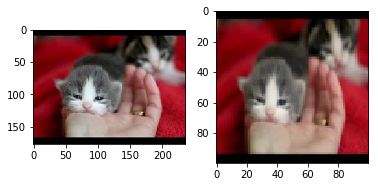

In [15]:
from scipy.misc import imread, imsave, imresize ### import some functions from the lib
import matplotlib.pyplot as plt # import the module and rename it as plt

# Read an JPEG image into a numpy array
img = imread ('../Datasets/cat_demo.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (177, 236, 3)"

# We can tint 调色 the image by scaling each of the color channels
# by a different scalar constant. The image has shape (177, 236, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (100, 100))

# Write the tinted image back to disk
imsave('../Datasets/cat_demo_tinted.jpg', img_tinted)

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

### 3.2. MATLAB files
The functions ```python scipy.io.loadmat and scipy.io.savemat``` allow you to read and write MATLAB files. You can read about them in the documentation

### 3.3. Distance between points
* ```python scipy.spatial.distance.pdist``` computes the distance between all pairs of points in a given set:
* ```python scipy.spatial.distance.cdist``` computes the distance between all pairs across two sets of points

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

## 4. Matplotlib (plotting library)

### 4.1. Plotting

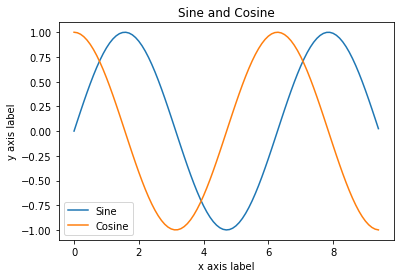

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

### 4.2. Subplots

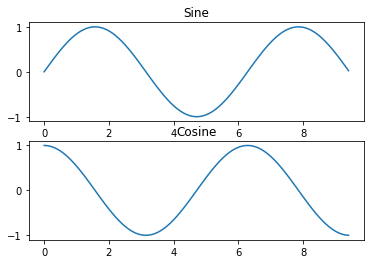

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()